In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

df = pd.read_csv('../data/final_per_90_and_pAdj.csv')

In [3]:
df.columns

Index(['fb_id', 'player_name', 'Squad_from_op', 'Opposing_Poss',
       'Opposing_Touches', 'Nation', 'Position', 'Nineties', 'xA', 'Key_pass',
       'Comp_prog', 'Total_Cmp', 'Total_Att', 'Total_Cmp_pct',
       'Total_Tot_Dist', 'Total_Prg_Dist', 'Short_Cmp', 'Short_Att',
       'Short_Cmp_pct', 'Medium_Cmp', 'Medium_Att', 'Medium_Cmp_pct',
       'Long_Cmp', 'Long_Att', 'Long_Cmp_pct', 'touches', 'touches_def_box',
       'touches_def_3rd', 'touches_mid_3rd', 'touches_att_3rd',
       'touches_att_box', 'touch_live', 'dribble_Succ', 'dribble_Att',
       'dribble_Succ_pct', 'num_dribble_past', 'dribble_megs', 'carries',
       'carries_dist', 'carries_prog_dist', 'carries_prog', 'carries_att_3rd',
       'carries_att_box', 'miss_control', 'dispossed', 'recep_targ',
       'recep_succ', 'recept_pct', 'Fouls_drawn', 'Offsides', 'Crosses',
       'PK_won', 'Aerial_win_pct', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90',
       'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG'

In [ ]:
'Crosses','carries_prog'

492


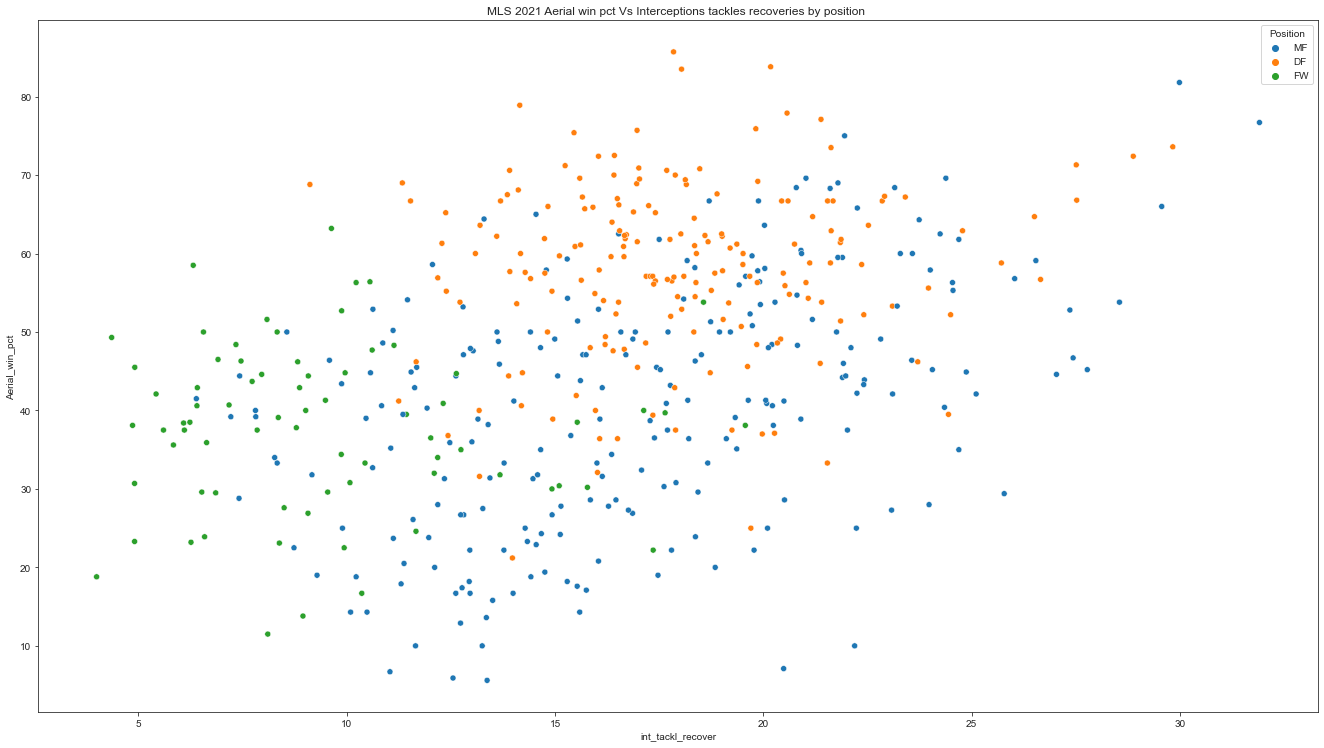

In [5]:
df['int_tackl_recover'] = df['pAdj_def_interceptions']+df['pAdj_from_mish_tackles_won']+df['pAdj_Recoveries']

graph = df.loc[(df['int_tackl_recover']<35)&(df['Position']!='GK')&(df['Aerial_win_pct']<100)&
               (df['Aerial_win_pct']>0)&(df['Nineties']>5)]

print(len(graph))
sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# plt.gca().invert_xaxis()
# plt.xticks(rotation = 90)


g = sns.scatterplot(data=graph, x ='int_tackl_recover', y='Aerial_win_pct' ,hue='Position',
                ax=ax).set(title='MLS 2021 Aerial win pct Vs Interceptions tackles recoveries by position ')

plt.tight_layout()

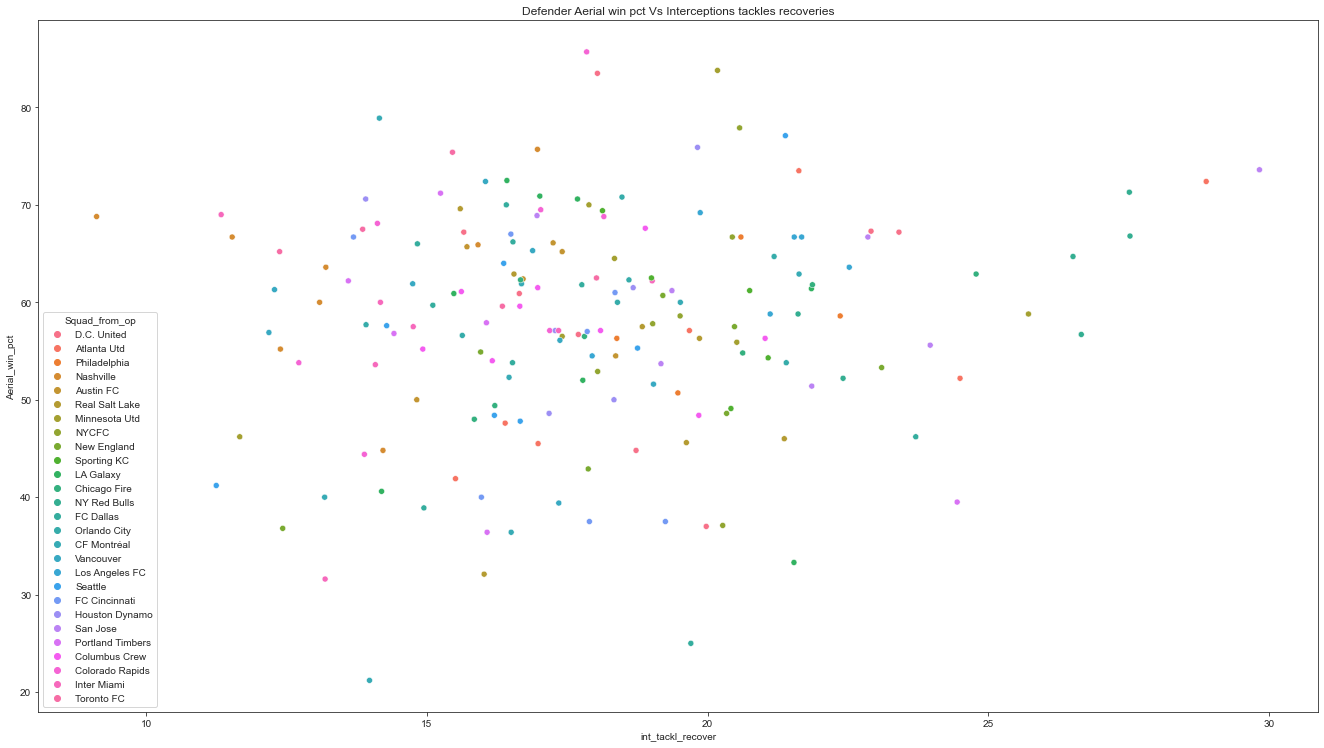

In [6]:
graph = df.loc[(df['int_tackl_recover']<35)&(df['Position']=='DF')&(df['Aerial_win_pct']<100)&
               (df['Aerial_win_pct']>0)&(df['Nineties']>5)]


sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# plt.gca().invert_xaxis()
# plt.xticks(rotation = 90)


g = sns.scatterplot(data=graph, x ='int_tackl_recover', y='Aerial_win_pct' ,hue='Squad_from_op',
                ax=ax).set(title='Defender Aerial win pct Vs Interceptions tackles recoveries')

plt.tight_layout()

In [53]:
graph.loc[(graph['int_tackl_recover']>20)&(graph['Aerial_win_pct']>60)][['player_name','Squad_from_op','int_tackl_recover','Total_Prg_Dist','carries_prog_dist',
                                 'Long_Cmp','Long_Cmp_pct',
                                 'Opposing_Poss','Opposing_Touches','Nineties']].sort_values('Long_Cmp',ascending=False)

,player_name,Squad_from_op,int_tackl_recover,Total_Prg_Dist,carries_prog_dist,Long_Cmp,Long_Cmp_pct,Opposing_Poss,Opposing_Touches,Nineties
59,Graham Zusi,Sporting KC,20.748695,376.567797,153.728814,11.398305,66.6,45.0,577.941176,23.6
256,Carlos Terán,Chicago Fire,21.866479,458.518519,74.814815,10.462963,55.1,50.2,592.823529,10.8
127,Andrew Gutman,NY Red Bulls,26.507952,303.431373,100.784314,6.519608,48.0,51.9,588.058824,20.4
332,Emmanuel Más,Orlando City,21.183943,397.105263,131.973684,4.210526,47.1,48.9,577.647059,7.6
60,Julian Araujo,LA Galaxy,21.848311,282.612903,117.612903,4.161290,56.6,45.7,584.676471,31.0
269,Tommy Thompson,San Jose,22.854144,279.397590,154.698795,3.253012,60.0,47.4,548.264706,8.3


In [36]:
graph.loc[graph['Aerial_win_pct']>77][['player_name','Squad_from_op','int_tackl_recover','Total_Prg_Dist','carries_prog_dist',
                                 'Long_Cmp','Long_Cmp_pct',
                                 'Opposing_Poss','Opposing_Touches','Nineties']].sort_values('Long_Cmp',ascending=False)

,player_name,Squad_from_op,int_tackl_recover,Total_Prg_Dist,carries_prog_dist,Long_Cmp,Long_Cmp_pct,Opposing_Poss,Opposing_Touches,Nineties
480,Brent Kallman,Minnesota Utd,20.175633,280.985915,88.732394,8.380282,76.3,49.9,614.323529,14.2
456,Yeimar Gómez Andrade,Seattle,21.384702,285.202703,81.959459,7.567568,69.6,51.4,628.764706,29.6
490,Maxime Chanot,NYCFC,20.569370,271.695502,107.889273,6.262976,65.3,46.5,568.588235,28.9
485,Aljaž Struna,CF Montréal,14.153486,386.666667,89.245283,5.974843,69.3,47.1,582.117647,15.9
409,Steve Birnbaum,D.C. United,18.036745,206.277778,37.333333,5.500000,61.9,54.0,603.705882,18.0
253,Lucas Esteves,Colorado Rapids,17.844808,256.213592,104.077670,3.398058,49.3,51.7,609.352941,10.3


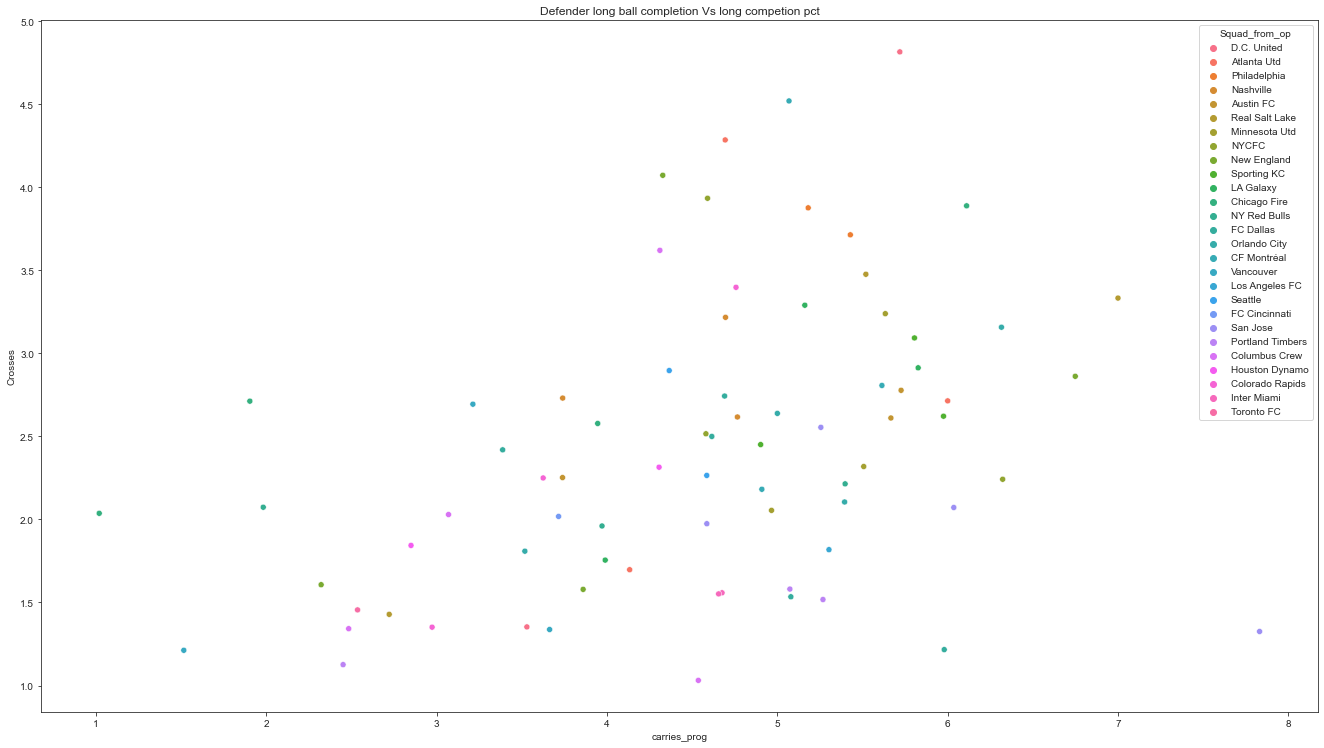

In [45]:



graph = df.loc[(df['Crosses']>1)&(df['int_tackl_recover']<35)&(df['Position']=='DF')&(df['Aerial_win_pct']<100)&
               (df['Aerial_win_pct']>0)&(df['Nineties']>5)]

sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# plt.gca().invert_xaxis()
# plt.xticks(rotation = 90)


g = sns.scatterplot(data=graph, x='carries_prog',y ='Crosses',hue='Squad_from_op',
                ax=ax).set(title='Defender long ball completion Vs long competion pct')

plt.tight_layout()

In [48]:
graph.loc[(graph['Crosses']>3)&(graph['carries_prog']>5.5)][['player_name','Squad_from_op','Crosses','carries_prog','Total_Prg_Dist','carries_prog_dist',
                                 'Long_Cmp','Long_Cmp_pct',
                                 'Opposing_Poss','Opposing_Touches','Nineties']].sort_values('Long_Cmp',ascending=False)

,player_name,Squad_from_op,Crosses,carries_prog,Total_Prg_Dist,carries_prog_dist,Long_Cmp,Long_Cmp_pct,Opposing_Poss,Opposing_Touches,Nineties
59,Graham Zusi,Sporting KC,3.093220,5.805085,376.567797,153.728814,11.398305,66.6,45.0,577.941176,23.6
1,Julian Gressel,D.C. United,4.816054,5.719064,366.153846,117.157191,7.424749,41.9,54.0,603.705882,29.9
34,Aaron Herrera,Real Salt Lake,3.476703,5.519713,363.189964,145.985663,7.383513,58.7,49.1,567.029412,27.9
43,Romain Métanire,Minnesota Utd,3.239437,5.633803,393.978873,128.591549,6.478873,56.3,49.9,614.323529,28.4
77,Ruan,Orlando City,3.157895,6.315789,221.913876,143.779904,3.732057,66.1,48.9,577.647059,20.9
311,Andrew Brody,Real Salt Lake,3.333333,7.000000,205.500000,162.750000,3.333333,51.9,49.1,567.029412,12.0
255,Jhon Espinoza,Chicago Fire,3.888889,6.111111,293.555556,117.222222,2.777778,41.7,50.2,592.823529,9.0


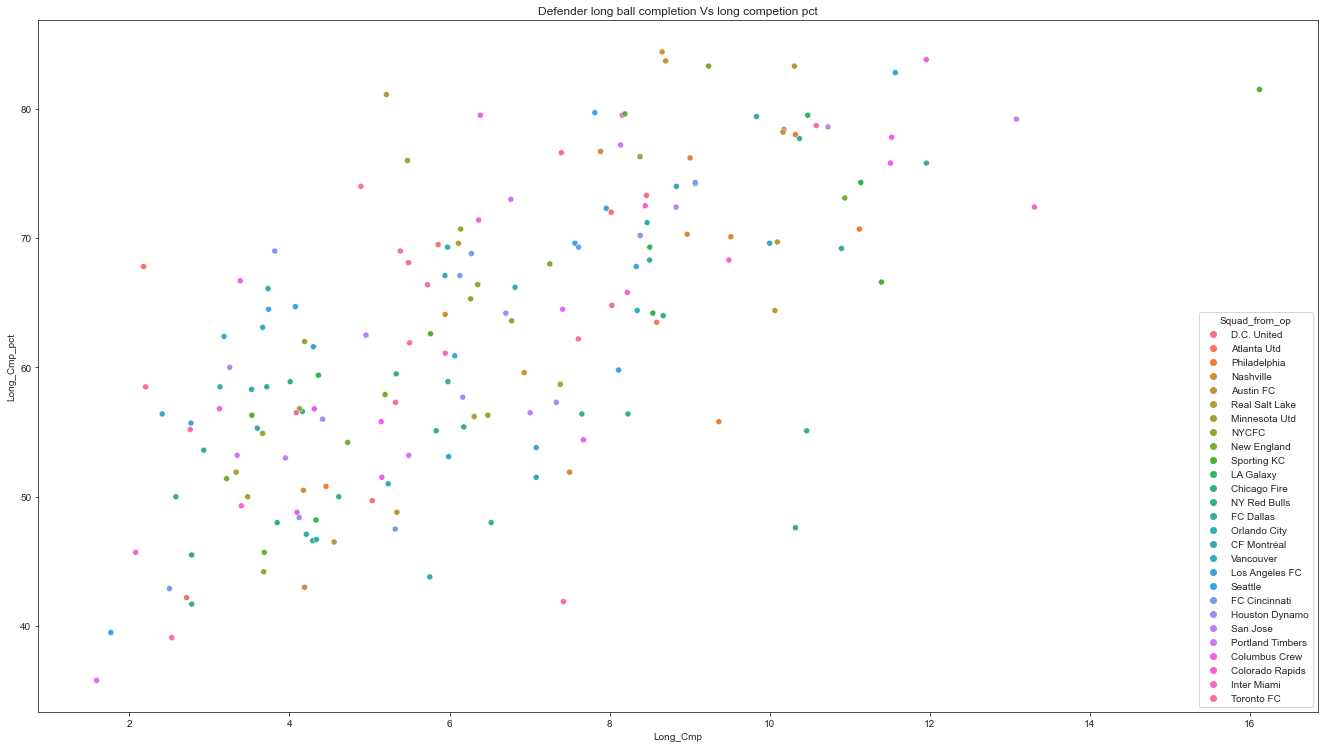

In [8]:
graph = df.loc[(df['int_tackl_recover']<35)&(df['Position']=='DF')&(df['Aerial_win_pct']<100)&
               (df['Aerial_win_pct']>0)&(df['Nineties']>5)]

sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# plt.gca().invert_xaxis()
# plt.xticks(rotation = 90)


g = sns.scatterplot(data=graph, x ='Long_Cmp', y='Long_Cmp_pct',hue='Squad_from_op',
                ax=ax).set(title='Defender long ball completion Vs long competion pct')

plt.tight_layout()

In [32]:
graph.loc[graph['Long_Cmp']>11.5][['player_name','Squad_from_op','Total_Prg_Dist','carries_prog_dist',
                                 'Long_Cmp','Long_Cmp_pct',
                                 'Opposing_Poss','Opposing_Touches','Nineties']].sort_values('Long_Cmp',ascending=False)

,player_name,Squad_from_op,Total_Prg_Dist,carries_prog_dist,player_name,Long_Cmp,Long_Cmp_pct,Opposing_Poss,Opposing_Touches,Nineties
316,Andreu Fontàs,Sporting KC,558.000000,246.757576,Andreu Fontàs,16.121212,81.5,45.0,577.941176,33.0
422,Danny Wilson,Colorado Rapids,441.286765,124.485294,Danny Wilson,13.308824,72.4,51.7,609.352941,27.2
415,Oswaldo Alanís,San Jose,334.537445,137.180617,Oswaldo Alanís,13.083700,79.2,47.4,548.264706,22.7
412,Bressan,FC Dallas,438.144330,133.608247,Bressan,11.958763,75.8,48.9,593.529412,19.4
627,Vito Wormgoor,Columbus Crew,405.594406,91.748252,Vito Wormgoor,11.958042,83.8,48.3,568.823529,14.3
443,Florian Jungwirth,Vancouver,278.264463,107.520661,Florian Jungwirth,11.570248,82.8,53.9,623.323529,12.1
444,Jonathan Mensah,Columbus Crew,357.695035,71.453901,Jonathan Mensah,11.524823,77.8,48.3,568.823529,28.2
481,Aboubacar Keita,Columbus Crew,335.188679,81.603774,Aboubacar Keita,11.509434,75.8,48.3,568.823529,10.6


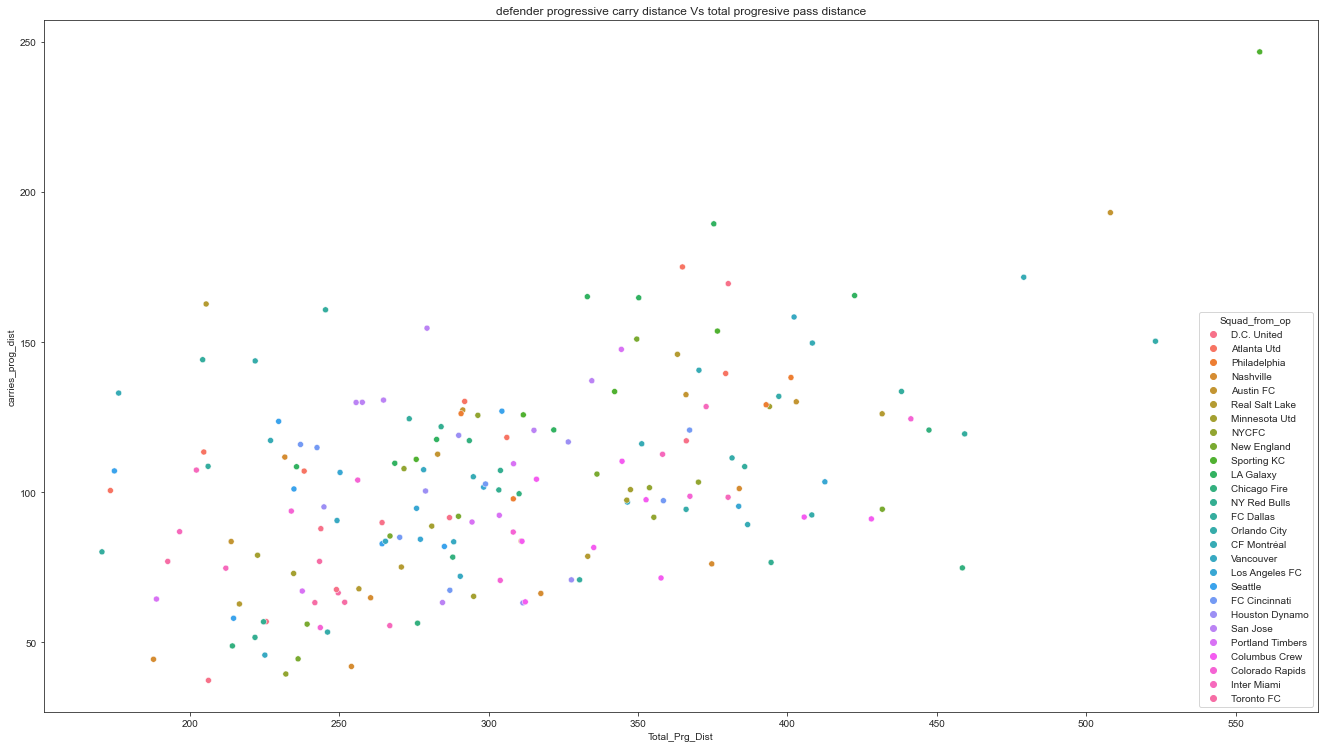

In [10]:
graph = df.loc[(df['int_tackl_recover']<35)&(df['Position']=='DF')&(df['Aerial_win_pct']<100)&
               (df['Aerial_win_pct']>0)&(df['Nineties']>5)]
sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# plt.gca().invert_xaxis()
# plt.xticks(rotation = 90)


g = sns.scatterplot(data=graph, x ='Total_Prg_Dist', y='carries_prog_dist',hue='Squad_from_op',
                ax=ax).set(title='defender progressive carry distance Vs total progresive pass distance')

plt.tight_layout()


In [29]:
graph.loc[df['Total_Prg_Dist']>450][['player_name','Long_Cmp','Long_Cmp_pct','Total_Prg_Dist','carries_prog_dist',
                                  
                                  'Nineties']].sort_values('Total_Prg_Dist')

,player_name,Long_Cmp,Long_Cmp_pct,Total_Prg_Dist,carries_prog_dist,Nineties
256,Carlos Terán,10.462963,55.1,458.518519,74.814815,10.8
486,José Antonio Martínez Gil,10.898204,69.2,459.281437,119.461078,16.7
310,Kamal Miller,6.818182,66.2,479.053030,171.666667,26.4
411,Matt Besler,10.309278,83.3,508.041237,193.195876,19.4
185,João Moutinho,7.083333,51.5,523.125000,150.347222,14.4
316,Andreu Fontàs,16.121212,81.5,558.000000,246.757576,33.0


In [ ]:
'Key_pass',
       'Comp_prog', 'Total_Prg_Dist', 'dribble_Succ_pct', 'num_dribble_past', 'dribble_megs', 'carries',
       'carries_dist', 'carries_prog_dist'

In [8]:
df['Comp_prog'].describe()

count    705.000000
mean       2.841329
std        1.942034
min        0.000000
25%        1.527778
50%        2.727273
75%        3.958333
max       17.000000
Name: Comp_prog, dtype: float64

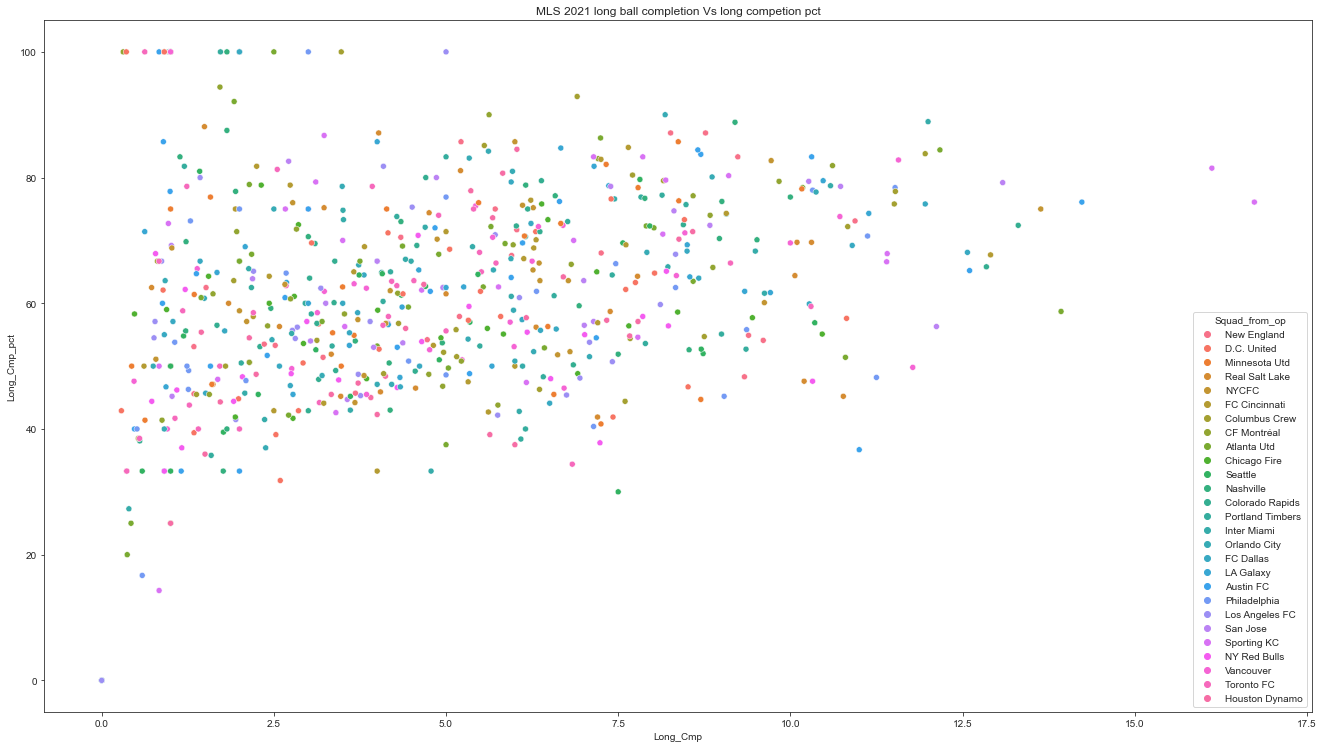

In [9]:
sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# plt.gca().invert_xaxis()
# plt.xticks(rotation = 90)


g = sns.scatterplot(data=df, x ='Long_Cmp', y='Long_Cmp_pct',hue='Squad_from_op',
                ax=ax).set(title='MLS 2021 long ball completion Vs long competion pct')

plt.tight_layout()


In [6]:
df.loc[df['Long_Cmp']>15][['player_name', 'Squad_from_op',
       'Long_Att','Long_Cmp','Long_Cmp_pct', 'Nation', 'Position', 'Nineties',
       'xA', 'Key_pass']]

,player_name,Squad_from_op,Long_Att,Long_Cmp,Long_Cmp_pct,Nation,Position,Nineties,xA,Key_pass
316,Andreu Fontàs,Sporting KC,19.787879,16.121212,81.5,es ESP,DF,33.0,0.009091,0.242424
327,Ilie Sánchez,Sporting KC,22.007168,16.738351,76.1,es ESP,MF,27.9,0.010753,0.286738


In [ ]:
sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# plt.gca().invert_xaxis()
# plt.xticks(rotation = 90)


g = sns.scatterplot(data=df, x ='Long_Cmp', y='Long_Cmp_pct',hue='Position',
                ax=ax).set(title='MLS 2021 long ball completion Vs long competion pct')

plt.tight_layout()
